# Classification Methods Visualization

This notebook will guide you through the process of using logistic regression, LDA and QDA for classification tasks. You will start with a binary classification problem and attempt to solve it using logistic regression. You will then extend it to a more complicated dataset to classify it using LDA and QDA

#### Objectives:

- Implement logistic regression for binary classification.
- Understand differences between LDA and QDA.
- Implement LDA and QDA for multivariate data.

---

#### Imports and plotting function

In [123]:
## Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [124]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.inspection import DecisionBoundaryDisplay

cmap = colors.ListedColormap(["tab:red", "tab:blue"])

def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(["tab:red", "tab:blue"])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="pcolormesh",
        ax=ax,
        cmap="RdBu",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], "tab:red", ax)
    plot_ellipse(estimator.means_[1], covariance[1], "tab:blue", ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set(xticks=[], yticks=[])

#### Logistic Regression for Classification

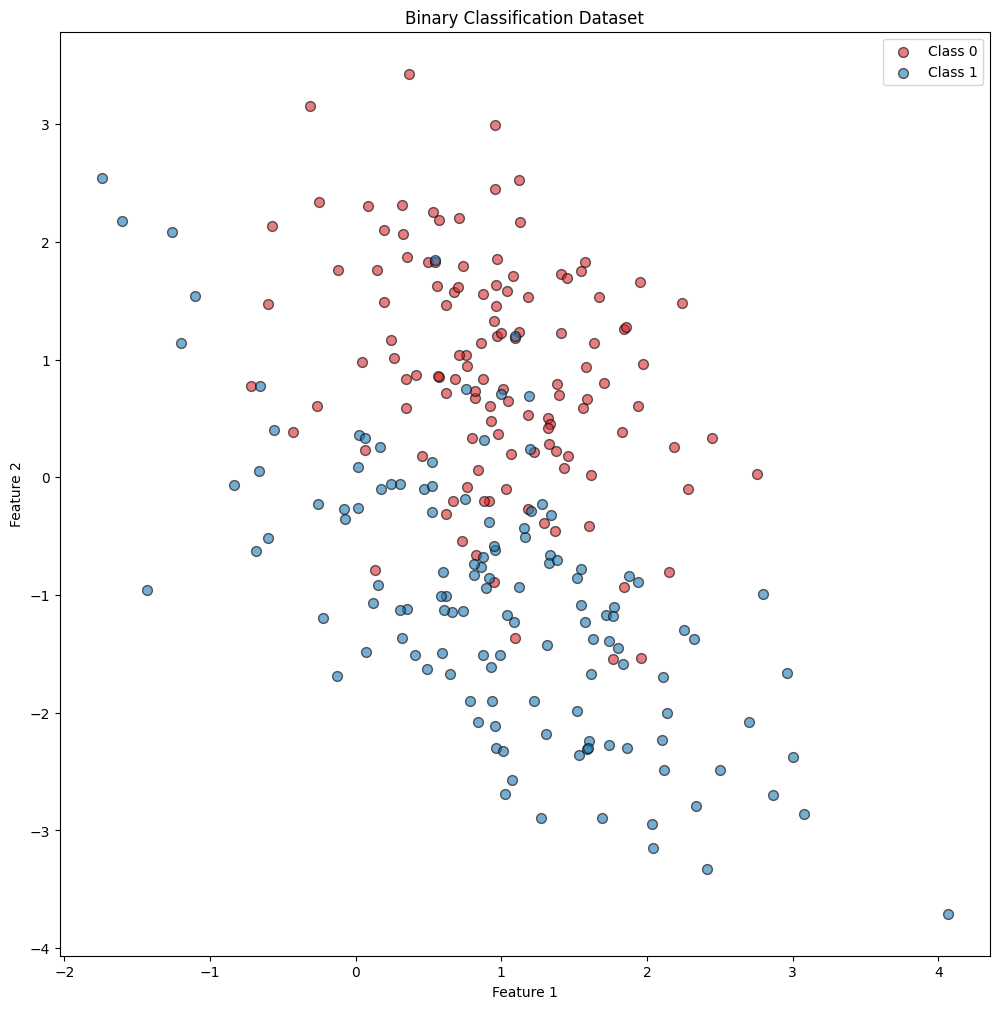

In [125]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=250, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=1)

# Visualize the dataset
plt.figure(figsize=(12,12))
# Plot points for Class 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], color=cmap(0.1), s=50, label='Class 0', alpha=0.6, edgecolors='k')
# Plot points for Class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color=cmap(0.9), s=50, label='Class 1', alpha=0.6, edgecolors='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1'])
plt.show()


**Exercise 1:** Check range of outputs by plotting the histogram of them comment on the reason of the interval. (2 Points)

[0.97333883 0.97035147 0.55347298 0.97557501 0.01230559 0.93401719
 0.58676227 0.32188573 0.10803717 0.01225671 0.52958399 0.10482093
 0.96647221 0.94984434 0.89640252 0.94689702 0.00880082 0.84730137
 0.06347382 0.59252698 0.23785449 0.06928321 0.91092922 0.91772179
 0.6062103  0.6839371  0.90776935 0.22778492 0.98716688 0.9466147
 0.59130061 0.61697938 0.95642479 0.86098877 0.26290715 0.99127696
 0.67301658 0.01002943 0.36588945 0.97066562 0.97389456 0.05540185
 0.86901184 0.19211826 0.02067372 0.19581176 0.90548911 0.11359045
 0.5864306  0.99015884 0.9636229  0.50433741 0.95126703 0.30095533
 0.96710786 0.17641256 0.63766979 0.83977423 0.51679321 0.9495454
 0.08688326 0.12244962 0.14961777 0.92350721 0.82258589 0.03836448
 0.23144924 0.98692309 0.03751102 0.25606101 0.87620291 0.86015256
 0.14095237 0.27233066 0.9473306 ]


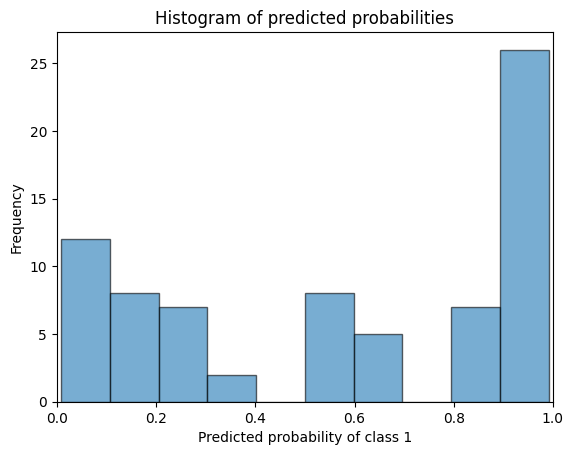

In [126]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_prob_all = logistic_regressor.predict_proba(X_test)

# Select only the probabilities for class 1
y_pred_prob = y_pred_prob_all[:, 1]

# TODO - Print histogram of predicted probabilities
#y_pred_prob = #TODO
# the interval is between 0 and 1 because in linear regression we are working with probabilities and the probabilities are always between 0 and 1
#we did the linear regression with class 1 and then did a plot on it, so the histogram is just showing us the probabilities.
print(y_pred_prob)
plt.hist(y_pred_prob, bins=10, edgecolor= 'k', alpha=0.6)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of class 1')
plt.ylabel('Frequency')
plt.show()

**Exercise 2:** Convert the probability predictions to binary class labels using 0.5 as threshold and compute Type-1 and Type-2 error. (2 Points)